In [11]:
import numpy as np
import glob
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import mplhep as hep
import matplotlib.colors as mcolors
import hist as hist2
mplhep.style.use(mplhep.style.CMS)

In [2]:
def jsonload(fname):
    with open(fname) as jsonfile:
        try:
            return json.load(jsonfile)
        except Exception:
            print(fname)

In [4]:
fdir = "/Users/alexcampbell/Documents/Research/Fermilab/PLLLockingrange/packaged_Sep_21_2023"
fnames = list(np.sort(glob.glob(f"{fdir}/*.json")))
all_files = fnames.copy()

In [5]:
data = [jsonload(fname) for fname in fnames]

for i in range(len(data)):
    if data[i] == None:
        data.remove(data[i])

In [8]:
min_freq = []
max_freq = []
for i in range(len(data)):
    for j in range(len(data[i]['tests'])):
        if "metadata" in data[i]['tests'][j]:
            if 'min_freq' in data[i]['tests'][j]['metadata']:
                min_freq.append(data[i]['tests'][j]['metadata']['min_freq'])
                max_freq.append(data[i]['tests'][j]['metadata']['max_freq'])
min_freq = np.array(min_freq)
max_freq = np.array(max_freq)
            


In [9]:
freq_range = max_freq - min_freq
avg_freq = (max_freq+min_freq)/2

In [82]:
np.mean(freq_range)

8.630555555555556

In [81]:
np.mean(avg_freq)

45.13611111111111

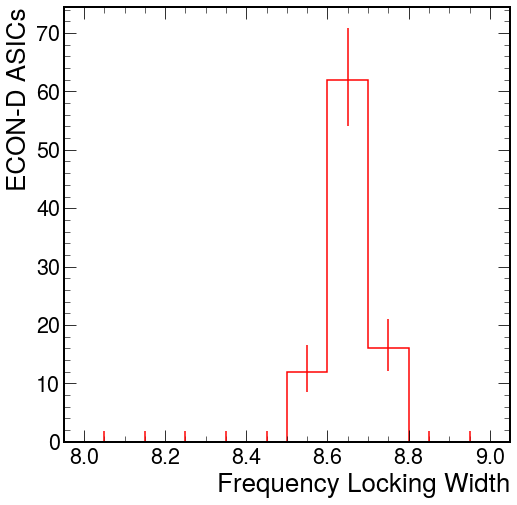

In [66]:
freq_range_axis = hist2.axis.Regular(10, 8, 9, name="freq_ranges", label="Frequency Locking Width")
hfreq_range = hist2.Hist(freq_range_axis)
hfreq_range.fill(
        freq_ranges=freq_range,
    )
fig,ax=plt.subplots(1,1,figsize=(8,8)) 
ax.set_ylabel("ECON-D ASICs")
hep.histplot(
            hfreq_range,
            ax=ax,
            color='red',
            label='Max width'
        )
fig.savefig("/Users/alexcampbell/Documents/Research/Fermilab/PLLLockingrange/plots/ECOND_Freq_Locking_range.pdf", format="pdf", bbox_inches="tight")

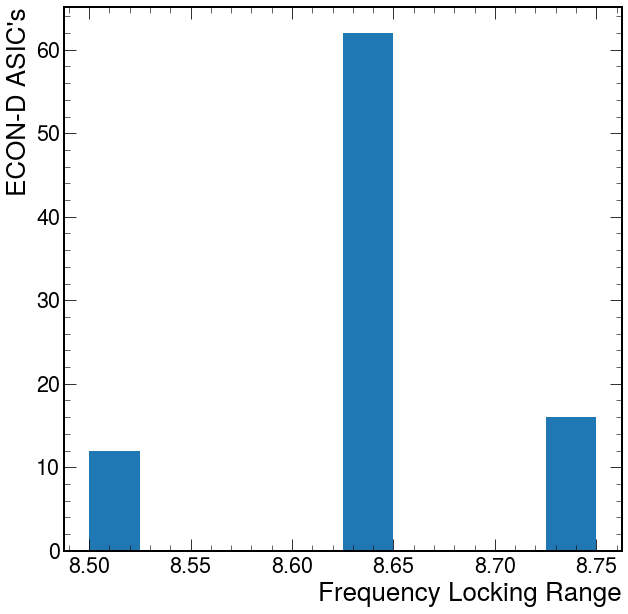

In [18]:

plt.hist(freq_range)
plt.xlabel("Frequency Locking Width")
plt.ylabel("ECON-D ASIC's")
plt.savefig("/Users/alexcampbell/Documents/Research/Fermilab/PLLLockingrange/plots/ECOND_frequency_locking_range.pdf", format="pdf", bbox_inches="tight")

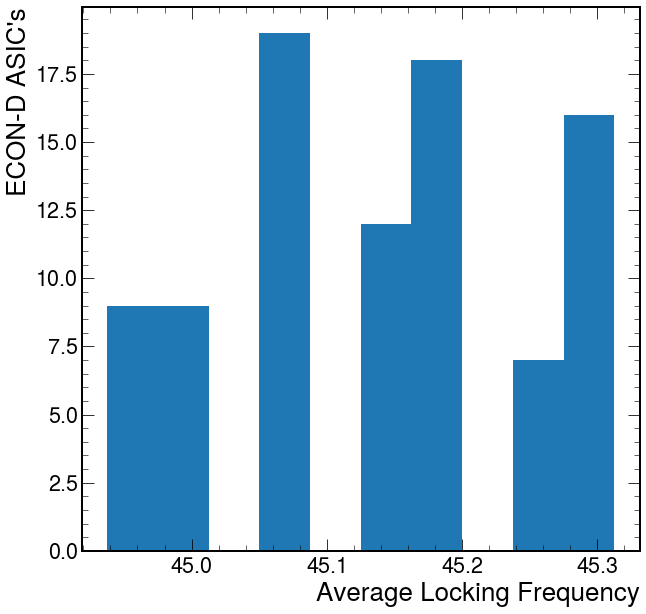

In [19]:
plt.hist(avg_freq)
plt.xlabel("Average Locking Frequency")
plt.ylabel("ECON-D ASIC's")
plt.savefig("/Users/alexcampbell/Documents/Research/Fermilab/PLLLockingrange/plots/ECOND_average_locking_frequency.pdf", format="pdf", bbox_inches="tight")

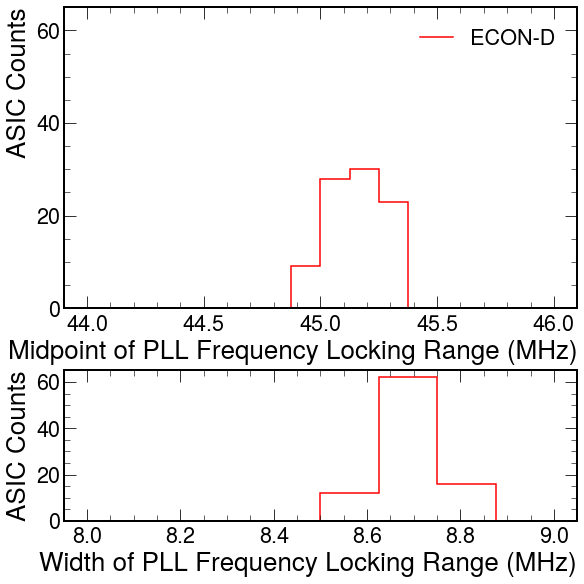

In [83]:
freq_range_axis = hist2.axis.Regular(8, 8, 9, name="freq_ranges", label="Width of PLL Frequency Locking Range (MHz)")
hfreq_range = hist2.Hist(freq_range_axis)
hfreq_range.fill(
        freq_ranges=freq_range,
    ) 
ax.set_ylabel("ECON-D ASICs")
hep.histplot(
            hfreq_range,
            ax=ax,
            color='red',
            label='Max width'
        )

avg_range_axis = hist2.axis.Regular(16,44,46, name="freq_ranges", label="Midpoint of PLL Frequency Locking Range (MHz)")
havg_range = hist2.Hist(avg_range_axis)
havg_range.fill(
        freq_ranges=avg_freq,
    )
 
ax.set_ylabel("ECON-D ASICs")
hep.histplot(
            hfreq_range,
            ax=ax,
            color='red',
            label='Max width'
        )

fig,axs=plt.subplots(2,1,figsize=(8,8), gridspec_kw={'height_ratios': [2, 1]}, sharey=True, layout="constrained")
axs[0].set_ylabel("ASIC Counts")
hep.histplot(
            havg_range,
            ax=axs[0],
            color='red',
            label='ECON-D',
            yerr=False
        )
axs[0].legend(loc = "upper right")
axs[1].set_ylabel("ASIC Counts")
hep.histplot(
            hfreq_range,
            ax=axs[1],
            color='red',
            label='Max width',
            yerr=False
        )
fig.savefig("/Users/alexcampbell/Documents/Research/Fermilab/PLLLockingrange/plots/ECOND_Freq_plots.pdf", format="pdf", bbox_inches="tight")